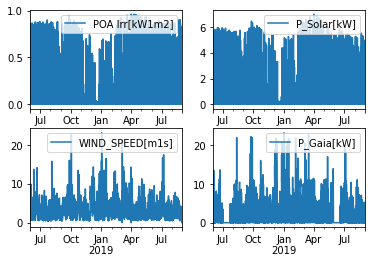

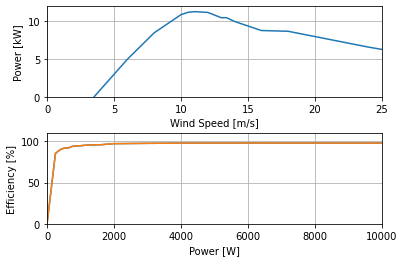

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt


def import_PV_WT_data():
    """
    Returns
    -------
    PV : dict
        Holds data regarding the PV string in SYSLAB 715
    WT : dict
        Holds data regarding the Gaia wind turbine
    """

    PV = {
        "Type": "Poly-cristaline",
        "Az": 60,  # deg
        "Estc": 1000,  # W/m**2
        "Tstc": 25,  # C
        'Pmp_stc': [165, 125],  # W
        'ganma_mp': [-0.478 / 100, -0.45 / 100],  # 1/K
        'Ns': [18, 6],  # int
        'Np': [2, 2],  # int
        'a': [-3.56, -3.56],  # module material construction parameters a, b and D_T
        'b': [-0.0750, -0.0750],
        'D_T': [3, 3],  # represents the difference between the module and cell temperature
        # these three parameters correspond to glass/cell/polymer sheet with open rack
        # they are extracted from Sandia document King, Boyson form 2004 page 20
        'eff_P': [[0, 250, 400, 450, 500, 600, 650, 750, 825, 1000, 1200, 1600, 2000, 3000, 4000, 6000, 8000, 10000],
                  [0, 250, 400, 450, 500, 600, 650, 750, 825, 1000, 1200, 1600, 2000, 3000, 4000, 6000, 8000, 10000]],
        'eff_%': [[0, 85.5, 90.2, 90.9, 91.8, 92, 92.3, 94, 94.4, 94.8, 95.6, 96, 97.3, 97.7, 98, 98.1, 98.05, 98],
                  [0, 85.5, 90.2, 90.9, 91.8, 92, 92.3, 94, 94.4, 94.8, 95.6, 96, 97.3, 97.7, 98, 98.1, 98.05, 98]],
        "index": ['A', 'B'],  # A and B refer to each channel of the inverter, which has connected a different string.
    }

    WT = {
        "Type": "Asynchronous",
        "Mode": "Passive, downwind vaning",
        "Pn": 11,  # kW
        "Vn": 400,  # V
        'CWs': [3.5, 6, 8, 10, 10.5, 11, 12, 13, 13.4, 14, 16, 18, 20, 22, 24, 25, ],  # m/s
        'CP': [0, 5, 8.5, 10.9, 11.2, 11.3, 11.2, 10.5, 10.5, 10, 8.8, 8.7, 8, 7.3, 6.6, 6.3, ],  # kW
        "Cin": 3.5,  # m/s
        "Cout": 25,  # m/s
        "HH": 18,  # m
        "D": 13,  # m
        "SA": 137.7,  # m**2
        "B": 2,  # int
    }

    return PV, WT


#%% Import Data
# DATA=pd.read_hdf('SOLETE_short.h5')
DATA=pd.read_hdf('SOLETE_Pombo_60min.h5')
#DATA=pd.read_csv('/content/Wind Time Series Dataset(hourly).csv')
PVinfo, WTinfo = import_PV_WT_data()


#%% Plot a bit of data
fig, ax = plt.subplots(nrows=2, ncols=2)
DATA['POA Irr[kW1m2]'].plot(ax=ax[0,0], legend=True)
DATA['P_Solar[kW]'].plot(ax=ax[0,1], legend=True)
DATA['WIND_SPEED[m1s]'].plot(ax=ax[1,0], legend=True)
DATA['P_Gaia[kW]'].plot(ax=ax[1,1], legend=True)
plt.show()

#%% Plot the power curve of the WT and the efficiency curve of the PV array
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(WTinfo["CWs"], WTinfo["CP"])
fig.subplots_adjust(hspace=0.4)
ax[1].plot(PVinfo["eff_P"][0], PVinfo["eff_%"][0])
ax[1].plot(PVinfo["eff_P"][1], PVinfo["eff_%"][1])


ax[0].set_xlim(0, 25)
ax[0].set_ylim(0, 12)
ax[0].set_xlabel('Wind Speed [m/s]')
ax[0].set_ylabel('Power [kW]')
ax[0].grid(True)

ax[1].set_xlim(0, 10000)
ax[1].set_ylim(0, 110)
ax[1].set_xlabel('Power [W]')
ax[1].set_ylabel('Efficiency [%]')
ax[1].grid(True)


plt.show()

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10969 entries, 2018-06-01 00:00:00 to 2019-09-01 00:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TEMPERATURE[degC]  10969 non-null  float64
 1   HUMIDITY[%]        10969 non-null  float64
 2   WIND_SPEED[m1s]    10969 non-null  float64
 3   WIND_DIR[deg]      10969 non-null  float64
 4   GHI[kW1m2]         10969 non-null  float64
 5   POA Irr[kW1m2]     10969 non-null  float64
 6   P_Gaia[kW]         10969 non-null  float64
 7   P_Solar[kW]        10969 non-null  float64
 8   Pressure[mbar]     10969 non-null  float64
dtypes: float64(9)
memory usage: 857.0 KB


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.models import load_model

def import_PV_WT_data():
    """
    Returns
    -------
    PV : dict
        Holds data regarding the PV string in SYSLAB 715
    WT : dict
        Holds data regarding the Gaia wind turbine
    """
    
    PV={
        "Type": "Poly-cristaline",
        "Az": 60,#deg
        "Estc": 1000, #W/m**2
        "Tstc": 25,#C
        'Pmp_stc' : [165, 125], #W
        'ganma_mp' : [-0.478/100, -0.45/100], #1/K
        'Ns':[18, 6], #int
        'Np':[2, 2], #int
        'a' : [-3.56, -3.56], #module material construction parameters a, b and D_T
        'b' : [-0.0750, -0.0750],
        'D_T' : [3, 3],# represents the difference between the module and cell temperature
                        #these three parameters correspond to glass/cell/polymer sheet with open rack
                        #they are extracted from Sandia document King, Boyson form 2004 page 20
        'eff_P' : [[0, 250, 400, 450, 500, 600, 650, 750, 825, 1000, 1200, 1600, 2000, 3000, 4000,  6000, 8000, 10000],
                   [0, 250, 400, 450, 500, 600, 650, 750, 825, 1000, 1200, 1600, 2000, 3000, 4000,  6000, 8000, 10000]],
        'eff_%' : [[0, 85.5, 90.2, 90.9, 91.8, 92, 92.3, 94, 94.4, 94.8, 95.6, 96, 97.3, 97.7, 98, 98.1, 98.05, 98],
                   [0, 85.5, 90.2, 90.9, 91.8, 92, 92.3, 94, 94.4, 94.8, 95.6, 96, 97.3, 97.7, 98, 98.1, 98.05, 98]],
       "index": ['A','B'], #A and B refer to each channel of the inverter, which has connected a different string.
        }
    
    WT={
        "Type": "Asynchronous",
        "Mode": "Passive, downwind vaning",
        "Pn": 11,#kW
        "Vn": 400,#V
        'CWs' : [3.5, 6, 8, 10, 10.5, 11, 12, 13, 13.4, 14, 16, 18, 20, 22, 24, 25,],#m/s
        'CP' : [0, 5, 8.5, 10.9, 11.2, 11.3, 11.2, 10.5, 10.5, 10, 8.8, 8.7, 8, 7.3, 6.6, 6.3,],#kW
        "Cin": 3.5,#m/s
        "Cout": 25,#m/s
        "HH": 18,#m
        "D": 13,#m
        "SA": 137.7,#m**2
        "B": 2,#int       
        }
    
    return PV, WT


def ExpandSOLETE(data, info, Control_Var):
    """
    
    Parameters
    ----------
    data : DataFrame
        Variable including all the data from the Solete dataset
    info : list
        Contains PVinfo and WTinfo which are dicts
    Control_Var : dict
        Holds information regarding what to do
    
    Returns
    -------
    Adds columns to data with new metrics. Some from the PV performance model [1], others from potentially useful metrics.
    """
    ncol=len(data.columns)       
        
    print("Expanding SOLETE with King's PV Performance Model")
    data['Pac'], data['Pdc'], data['TempModule'], data['TempCell'] = PV_Performance_Model(data, info[0])
    print("Cleaning noise and curtailment from active power production")
    data['P_Solar[kW]'] =  np.where(data['Pac'] >= 1.5*data['P_Solar[kW]'],
                                    data['Pac'], data['P_Solar[kW]'])
    print("Smoothing zeros")
    data['P_Solar[kW]'] =  np.where(data['P_Solar[kW]'] <= 0.001,
                                      0, data['P_Solar[kW]'])
    data['Pac'] =  np.where(data['Pac'] <= 0.001,
                                      0, data['Pac'])
    
    print("\nAdding new Types with codes: " + str(Control_Var['PossibleFeatures']))
    
    
    if 'HoursOfDay' in Control_Var['PossibleFeatures']: #time of the day hours
        data['HoursOfDay'] =  data.index.hour
    if 'MeanPrevH' in Control_Var['PossibleFeatures']: #mean previous horizon
        data['MeanPrevH'] =  data[ Control_Var['IntrinsicFeature']].rolling(Control_Var['H']).mean()
    if 'StdPrevH' in Control_Var['PossibleFeatures']: #std previous horizon
        data['StdPrevH'] =  data[Control_Var['IntrinsicFeature']].rolling(Control_Var['H']).std()
    if 'MeanWindSpeedPrevH' in Control_Var['PossibleFeatures']: #wind speed mean of the previous horizon
        data['MeanWindSpeedPrevH'] =  data['WIND_SPEED[m1s]'].rolling(Control_Var['H']).mean()
    if 'StdWindSpeedPrevH' in Control_Var['PossibleFeatures']: #wind speed std of the previous horizon
        data['StdWindSpeedPrevH'] =  data['WIND_SPEED[m1s]'].rolling(Control_Var['H']).std()
    

    print("\nSOLETE has been successfully expanded from:", ncol, "to:", len(data.columns), "features.\n\n")
    
    
    pass


def PV_Performance_Model(data, PVinfo, colirra='POA Irr[kW1m2]'):
    """
    Parameters
    ----------
    data : DataFrame
        Variable including all the data from the Solete dataset
    PVinfo : dict
        A bunch of parameters extracted from the datasheet and other supporting documents
        Check function: import_PV_WT_data for further details
    colirra : string
        holds Epoa, that is the irradiance in the plane of the array.
        If you reuse this code, make sure you are feeding Epoa and not GHI
        The default is 'POA Irr[kW1m2]'.
    Returns
    -------
    DataFrames
        Pac, Pdc, Tm, and Tc. [1]
    """
    
    
    # Obtains the expected solar production based on irradiance, temperature, pv parameters, etc
    DATA_PV = pd.DataFrame({'Pmp_stc' : PVinfo["Pmp_stc"],
                            'ganma_mp' : PVinfo['ganma_mp'],
                            'Ns': PVinfo['Ns'],
                            'Np': PVinfo['Np'],
                            'a' : PVinfo['a'],
                            'b' : PVinfo['b'],
                            'D_T' : PVinfo['D_T'],
                            'eff_P' : PVinfo['eff_P'],
                            'eff_%' : PVinfo['eff_%'],
                            }, 
                           index = PVinfo["index"])
    
    DATA_PV['eff_max_%'] = [max(DATA_PV['eff_%'].loc['A']), max(DATA_PV['eff_%'].loc['B'])] #maximum inverter efficiency in %
    DATA_PV['eff_max_P'] = [max(DATA_PV['eff_P'].loc['A']), max(DATA_PV['eff_P'].loc['B'])] #W maximum power output of the inverter
    
    Results = pd.DataFrame(index = data.index)
    
    for pv in DATA_PV.index:
        #Temperature Module
        Results['Tm_' + pv] = data['TEMPERATURE[degC]'] + data[colirra]*1000 *np.exp(DATA_PV.loc[pv,'a']+DATA_PV.loc[pv,'b']*data['WIND_SPEED[m1s]']) 
        #Temperature Cell
        Results['Tc_' + pv] = Results['Tm_' + pv] + data[colirra]*1000/PVinfo["Estc"] * DATA_PV.loc[pv,'D_T']
        #power produced in one single pannel
        Results['Pmp_panel_' + pv] = data[colirra]*1000/PVinfo["Estc"] * DATA_PV.loc[pv, 'Pmp_stc'] * (1+DATA_PV.loc[pv, 'ganma_mp'] * (Results['Tc_' + pv] - PVinfo["Tstc"]) )
        #power produced by all the panels in the array
        Results['Pmp_array_' + pv] = DATA_PV.loc[pv, 'Ns'] * DATA_PV.loc[pv, 'Np'] * Results['Pmp_panel_' + pv]
        #efficiency of the inverter corresponding to the instantaneous power output
        Results['eff_inv_' + pv] =  np.interp(Results['Pmp_array_' + pv], DATA_PV.loc[pv, 'eff_P'], DATA_PV.loc[pv, 'eff_%'], left=0)/100
        
        
        Results['Pac_' + pv] =  DATA_PV.loc[pv, 'eff_max_%']/100 * Results['Pmp_array_' + pv]
        Results[Results['Pac_' + pv]>DATA_PV.loc[pv, 'eff_max_P']]=DATA_PV.loc[pv, 'eff_max_P'] #If any of the Pac is > than the maximum capacity of the inverter 
        # then use the max capacity of the inverter
        Results[Results['Pac_' + pv]<0]=0
        
    return Results[['Pac_A', 'Pac_B']].sum(axis=1)/1000, Results[['Pmp_array_A', 'Pmp_array_B']].sum(axis=1)/1000, Results[['Tm_A', 'Tm_B']].mean(axis=1), Results[['Tc_A', 'Tc_B']].mean(axis=1)


def TimePeriods(data, control):
    """
    A function that will split the time series to input and output for training 
    of the forecast problem with supervised learning
    Parameters
    ----------
    data : DataFrame
        Variable including all the data from the Solete dataset
    control : dict
        Control_Var.
    Returns
    -------
    dik : dict of DataFrames
        cotains the train and testing sets for RF and SVM
        or the train, validation and testing for ANN
        
    Arguments
    ---------
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        base: Is the basic variable that will be shifted back and forward in time, e.g. Pestimated
        additions: are the other variables that will tag along base to complete the dataset
        train_val_test = division of timestamps in the three blocks
    """
    n_in=control["PRE"]
    n_out=control["H"]
    base=control["IntrinsicFeature"]
    additions= control["PossibleFeatures"].copy()
    #additions.remove(control["IntrinsicFeature"])
    train_val_test = control['Train_Val_Test']
    
    if control['MLtype'] in ['RF', 'SVM']: 
        data.fillna(0, inplace=True)
           
        BASE = series_to_supervised(data[base], n_in, n_out, dropnan=False)
        
        col_loc_base = []
        for addition in additions:
            BASE[addition] = data[addition]
            col_loc_base.append(BASE.columns.get_loc(addition))
        
        
        BASE.dropna(inplace=True)
            
            
        X_COLS = [*range(0,n_in+1)]+col_loc_base  #because they are the PRE+t0 current sample
        Y_COLS = [*range(n_in+1,n_in+n_out+1)]
        
        X=BASE.iloc[:, X_COLS]
        Y=BASE.iloc[:, Y_COLS]    
        X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=train_val_test[-1]/100, shuffle=False, random_state=None)
        
        Scaler = {
                  'X_data' : 1,
                  'Y_data' : 1,
                  }
    
        
        ML_DATA = {
            "X_TRAIN": X_TRAIN.sort_index(),
            "X_TEST": X_TEST.sort_index(),
            "Y_TRAIN": Y_TRAIN.sort_index(),
            "Y_TEST": Y_TEST.sort_index(),
            "Y_TEST_abs": Y_TEST.sort_index(),
            }
    
    
    elif control['MLtype'] in ['LSTM', 'CNN', 'CNN_LSTM']:
        Xscaler = MinMaxScaler(feature_range=(0, 1)) #initialise the scaler 
        Yscaler = MinMaxScaler(feature_range=(0, 1)) #initialise the scaler   
            
        X = data[additions] 
        Y = data[base]
                   
        X = series_to_forecast(X, n_in, 0, dropnan=False)#.drop(X.index[-(n_out):])
        Y = series_to_forecast(Y, 0, n_out, dropnan=False).drop(base+'_(t)', axis=1)#.drop(Y.index[:(n_in)])
           
        X_TRAIN, X_VAL_TEST, Y_TRAIN, Y_VAL_TEST = train_test_split(X, Y, train_size=train_val_test[0]/100, shuffle=False, random_state=None)
        
        del X, Y
        
        X_VAL, X_TEST, Y_VAL, Y_TEST = train_test_split(X_VAL_TEST, Y_VAL_TEST, train_size=train_val_test[1]/(100-train_val_test[0]), shuffle=False, random_state=None)
            
        del X_VAL_TEST, Y_VAL_TEST
            
        #apply scaler to keep all values between 0 and 1
        X_TRAIN = pd.DataFrame(Xscaler.fit_transform(X_TRAIN), index=X_TRAIN.index, columns = X_TRAIN.columns)
        X_VAL = pd.DataFrame(Xscaler.transform(X_VAL), index=X_VAL.index, columns = X_VAL.columns)
        X_TEST = pd.DataFrame(Xscaler.transform(X_TEST), index=X_TEST.index, columns = X_TEST.columns)
        
        Y_TRAIN = pd.DataFrame(Yscaler.fit_transform(Y_TRAIN), index=Y_TRAIN.index, columns = Y_TRAIN.columns)
        Y_VAL = pd.DataFrame(Yscaler.transform(Y_VAL), index=Y_VAL.index, columns = Y_VAL.columns)
        Y_TEST_abs = pd.DataFrame(Y_TEST, index=Y_TEST.index, columns = Y_TEST.columns)
        Y_TEST = pd.DataFrame(Yscaler.transform(Y_TEST), index=Y_TEST.index, columns = Y_TEST.columns)
        
        
        # apply masking as to substitute a complete row by 999 if any of its values is NAN (aka missing value)
        X_TRAIN.mask(X_TRAIN.isna().any(axis=1), other=999, inplace=True)
        X_VAL.mask(X_VAL.isna().any(axis=1), other=999, inplace=True)
        X_TEST.mask(X_TEST.isna().any(axis=1), other=999, inplace=True)
        
        Y_TRAIN.mask(Y_TRAIN.isna().any(axis=1), other=999, inplace=True)
        Y_VAL.mask(Y_VAL.isna().any(axis=1), other=999, inplace=True)
        Y_TEST.mask(Y_TEST.isna().any(axis=1), other=999, inplace=True)
        Y_TEST_abs.mask(Y_TEST_abs.isna().any(axis=1), other=999, inplace=True)
        
        
        Scaler = {
                  'X_data' : Xscaler,
                  'Y_data' : Yscaler,
                  }
       
        ML_DATA = {
            "X_TRAIN": X_TRAIN.sort_index(),
            "X_VAL": X_VAL.sort_index(),
            "X_TEST": X_TEST.sort_index().drop(X_TEST.tail(n_out).index, axis=0),
            "Y_TRAIN": Y_TRAIN.sort_index(),
            "Y_VAL": Y_VAL.sort_index(),
            "Y_TEST": Y_TEST.sort_index().drop(Y_TEST.tail(n_out).index, axis=0),
            "Y_TEST_abs": Y_TEST_abs.sort_index().drop(Y_TEST.tail(n_out).index, axis=0),
            }
            
    else:
        print("\n\n\n WARNING: Your ML method is not supported by the 'TimePeriods' function.\n\n")
    
    return ML_DATA, Scaler


def series_to_forecast(data, n_in, n_out, dropnan=True):
    """
    A function that will split the time series to input and output for training 
    of the forecast problem with supervised learning
    Arguments:
        data: Sequence of observations as a list, NumPy array or pandas series
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    # n_vars = data.shape[1] 
    df = pd.DataFrame(data)
    cols, names = list(), list()
    COLUMNS = df.columns
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(col_name + '_(t-%d)' % (i)) for col_name in COLUMNS]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out+1):
        cols.append(df.shift(-i))

        if i == 0:
            names += [(col_name + '_(t)') for col_name in COLUMNS]
        else:
            names += [(col_name + '_(t+%d)' % (i)) for col_name in COLUMNS]
    # put it all together (aggregate)
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in, n_out, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



def PrepareMLmodel(control, ml_data):
    """
    Parameters
    ----------
    control : dict
        Control_Var
    ml_data : dict of dataframes
        It contains the training, validation and testing sets
    Returns
    -------
    ML : keras object or sci-kit learn object
        This is the trained model, it depends on which specific ML-method you are requesting
    """
    
    filename = "Trained_" + control['MLtype']
    
    if control['trainVSimport'] == True: #then, lets train a model
        
        
        if control['MLtype'] in ['RF', "SVM"]:
            filename = filename + ".joblib"
            if control['MLtype'] == 'RF':
                ML = RandomForestRegressor(n_estimators = control['RF']['n_trees'], random_state = control['RF']['random_state']) #initialize ML
            elif control['MLtype'] == 'SVM':
                ML = SVR(kernel = control['SVM']['kernel'], degree = control['SVM']['degree'],
                         gamma = control['SVM']['gamma'], coef0 = control['SVM']['coef0'],
                         C = control['SVM']['C'], epsilon = control['SVM']['epsilon']) #initialize ML
                if control["H"] > 1:
                    ML = MultiOutputRegressor(ML) #This is necessary for multioutput as SVR only support SO
            # It trains a separate SVR for each output whereas RF can inherently handle multiple classes and hence perform better
            
            print("Training " + control['MLtype'] + "...")
            ML.fit(X=ml_data['X_TRAIN'], y=ml_data['Y_TRAIN']) #train
            print("...Done")
        
        elif control['MLtype'] in ["LSTM", "CNN", "CNN_LSTM"]: 
            filename = filename + ".h5"
        
            if control['MLtype'] == 'LSTM':
                ML, ANN_training = train_LSTM(ml_data, control)
            elif control['MLtype'] == 'CNN':    
                ML, ANN_training = train_CNN(ml_data, control)
            elif control['MLtype'] == 'CNN_LSTM':
                ML, ANN_training = train_CNN_LSTM(ml_data, control)
            print("...Done")
            
            #Plot the train vs validation loss and save the Figure
            fig = plt.figure()
            plt.plot(ANN_training.history[ "loss" ])
            plt.plot(ANN_training.history[ "val_loss" ])
            plt.grid()
            plt.title("Model train vs validation loss")
            plt.ylabel( "Loss" )
            plt.xlabel( "Epoch" )
            plt.legend([ "Train" , "Validation"], loc= "upper right" )
            plt.savefig('Training_Evaluation_' + control['MLtype'], dpi=500)
            plt.show() 

        if control['trainVSimport'] and control['saveMLmodel']:
            if control['MLtype'] in ['RF', "SVM"]:
                print("Saving Trained Model with name:" + filename)
                joblib.dump(ML, filename)
                
            elif control['MLtype'] in ["LSTM", "CNN", "CNN_LSTM"]:
                print("Saving Trained Model with name:" + filename)
                ML.save(filename)
            print("...Done")
        else:
            print(control['MLtype'] + " was NOT saved.")

    else: #we dont train but import the ML
        if control['MLtype'] in ['RF', "SVM"]:
            filename = filename + ".joblib"
            print("Importing " + filename + "...")
            ML=joblib.load(filename)
            
        elif control['MLtype'] in ["LSTM", "CNN", "CNN_LSTM"]: 
            filename = filename + ".h5"
            print("Importing " + filename + "...")
            ML=load_model(filename)
        print("...Done")
    
        
    return ML




def train_LSTM(data, control):
    
    """
    data -> includes ML_DATA, that is the train, validation and test sets, without applying reshapes as a dict of dataframes
    Control_Var -> generic control variables as it brings stuff from LSTM as a dictionary
    pre -> previous number of samples to use in the prediction as an int
    hor -> prediction horizon as an int
    features -> basic feature and complements as a list of strings
    
    returns 
    ML -> the trained LSTM model
    ANN_training -> the history of the fit, can be used to plot loss function
    """
    pre=control["PRE"]
    hor=control["H"]
    features= control["PossibleFeatures"].copy()
    features.remove(control["IntrinsicFeature"])
    
    train_data = data['X_TRAIN'].values.reshape(len(data['X_TRAIN'].index), pre+1, len(features))
    validation_data = data['X_VAL'].values.reshape(len(data['X_VAL'].index), pre+1, len(features))
    
    train_target = data['Y_TRAIN'].values.reshape(len(data['Y_TRAIN'].index),hor)
    validation_target = data['Y_VAL'].values.reshape(len(data['Y_VAL'].index),hor)
    
    ##### Designing Neuronal Network #######
    ML = Sequential() #initialize
    ML.add(Masking(mask_value=999, input_shape=(pre+1, len(features)))) #add the mask so 999 = nan and are not taken into account
    if control['LSTM']['Dense'][0] > 0: #add a dense if the number of neurons is higher than 0
        ML.add(Dense(control['LSTM']['Dense'][0]))
    if len(control["LSTM"]["Neurons"]) > 1: #if there is another LSTM coming afterwards we need the true
        return_seq = True
    else: #if a dense comes afterwards we need the false
        return_seq = False
    ML.add(tf.keras.layers.LSTM(control["LSTM"]["Neurons"][0], input_shape=(train_data.shape[1], train_data.shape[2]),
                activation = control["LSTM"]["ActFun"],
                bias_initializer = "zeros", kernel_initializer = "random_uniform",
                return_sequences=return_seq)) #LSTM layer

    for index in range(1,len(control["LSTM"]["Neurons"])): #add the missing LSTM layers and a Dense after the last one
        if index != len(control["LSTM"]["Neurons"])-1:
            ML.add(tf.keras.layers.LSTM(control["LSTM"]["Neurons"][index], activation = control["LSTM"]["ActFun"], return_sequences=True)) #LSTM layers
        else:
            ML.add(tf.keras.layers.LSTM(control["LSTM"]["Neurons"][index], activation = control["LSTM"]["ActFun"], return_sequences=False)) #LSTM layers
            if control['LSTM']['Dense'][1] > 0: #we only add the dense one if the number of neurons is higher than 0
                ML.add(Dense(control['LSTM']['Dense'][1], activation = 'relu'))
    ML.add(Dense(hor)) #this is the output layer
    ### mean-absolute-error (MSAE) loss function & Adam version of stochastic gradient descent
    ML.compile(loss=control["LSTM"]["LossFun"], optimizer=control["LSTM"]["Optimizer"]) #, metrics=['mse', 'mae', 'mape', 'cosine']
    ML.summary()
    
    
    ANN_training = ML.fit(train_data, train_target,
                epochs = control["LSTM"]["epo_num"], 
                batch_size = control["LSTM"]["n_batch"],
                validation_data = (validation_data, validation_target), #fed here the validation data
                # validation_split
                verbose=2, #0-> shows nothing, 1-> shows progress bar, 2-> shows the number of epoch.
                shuffle=False)
                # callbacks=[tbGraph])
    # pass
    return ML, ANN_training, #data, 


def train_CNN(data, control):
    
    """
    data -> includes ML_DATA, that is the train, validation and test sets, without applying reshapes as a dict of dataframes
    Control_Var -> generic control variables as it brings stuff from LSTM as a dictionary
    pre -> previous number of samples to use in the prediction as an int
    hor -> prediction horizon as an int
    features -> basic feature and complements as a list of strings
    
    returns 
    ML -> the trained LSTM model
    ANN_training -> the history of the fit
    """
    pre=control["PRE"]
    hor=control["H"]
    features= control["PossibleFeatures"].copy()
    features.remove(control["IntrinsicFeature"])
    
    train_data = data['X_TRAIN'].values.reshape(len(data['X_TRAIN'].index), pre+1, len(features))
    validation_data = data['X_VAL'].values.reshape(len(data['X_VAL'].index), pre+1, len(features))
    
    train_target = data['Y_TRAIN'].values.reshape(len(data['Y_TRAIN'].index),hor)
    validation_target = data['Y_VAL'].values.reshape(len(data['Y_VAL'].index),hor)
    
    ##### Designing Neuronal Network #######
    ML = Sequential() #initialize
    ML.add(TimeDistributed(Masking(mask_value=999, input_shape=(pre+1, len(features))))) #add the mask so 999 = nan and are not taken into account
    ML.add(Conv1D(filters=control["CNN"]["filters"], kernel_size=control["CNN"]["kernel_size"], padding='same',
                  activation=control["CNN"]["ActFun"], input_shape=(train_data.shape[1], train_data.shape[2])))
    if control['CNN']['Dense'][0] > 0: #add a dense if the number of neurons is higher than 0
        ML.add(Dense(control['CNN']['Dense'][0]))
    ML.add(MaxPooling1D(pool_size=control["CNN"]["pool_size"],  padding='same'))
    if control['CNN']['Dense'][1] > 0: #we only add the dense one if the number of neurons is higher than 0
                ML.add(Dense(control['CNN']['Dense'][1], activation = 'relu'))
    ML.add(Flatten())
    ML.add(Dense(hor, activation = control["CNN"]["ActFun"]))
    ML.compile(loss=control["CNN"]["LossFun"], optimizer=control["CNN"]["Optimizer"]) #, metrics=['mse', 'mae', 'mape', 'cosine']
    ML.summary()
    
    
    ANN_training = ML.fit(train_data, train_target,
                epochs = control["CNN"]["epo_num"], 
                batch_size = control["CNN"]["n_batch"],
                validation_data = (validation_data, validation_target), #fed here the validation data
                # validation_split
                verbose=2, #0-> shows nothing, 1-> shows progress bar, 2-> shows the number of epoch.
                shuffle=False)
                # callbacks=[tbGraph])
    # pass
    return ML, ANN_training,

def train_CNN_LSTM(data, control):
    
    """
    data -> includes ML_DATA, that is the train, validation and test sets, without applying reshapes as a dict of dataframes
    Control_Var -> generic control variables as it brings stuff from LSTM as a dictionary
    pre -> previous number of samples to use in the prediction as an int
    hor -> prediction horizon as an int
    features -> basic feature and complements as a list of strings
    
    returns 
    ML -> the trained LSTM model
    ANN_training -> the history of the fit
    """
    pre=control["PRE"]
    hor=control["H"]
    features= control["PossibleFeatures"].copy()
    #features.remove(control["IntrinsicFeature"])
    
    train_data = data['X_TRAIN'].values.reshape(len(data['X_TRAIN'].index), pre+1, len(features))
    validation_data = data['X_VAL'].values.reshape(len(data['X_VAL'].index), pre+1, len(features))
    
    train_target = data['Y_TRAIN'].values.reshape(len(data['Y_TRAIN'].index),hor)
    validation_target = data['Y_VAL'].values.reshape(len(data['Y_VAL'].index),hor)
    
    ##### Designing Neuronal Network #######
    ML = Sequential() #initialize
    ML.add(Conv1D(filters=control["CNN_LSTM"]["filters"], kernel_size=control["CNN_LSTM"]["kernel_size"], 
                  activation=control["CNN_LSTM"]["CNNActFun"], padding = 'causal', input_shape=(train_data.shape[1], train_data.shape[2])))
    if control['CNN_LSTM']['Dense'][0] > 0: #add a dense if the number of neurons is higher than 0
        ML.add(Dense(control['CNN_LSTM']['Dense'][0]))   
    #ML.add(MaxPooling1D(pool_size=control["CNN_LSTM"]["pool_size"],  padding='same'))
    if control['CNN_LSTM']['Dense'][1] > 0: #we only add the dense one if the number of neurons is higher than 0
                ML.add(Dense(control['CNN_LSTM']['Dense'][1], activation = 'relu'))
    
    #ML.add(Masking(mask_value=999, input_shape=(pre+1, len(features)))) #add the mask so 999 = nan and are not taken into account
    ML.add(tf.keras.layers.LSTM(control["CNN_LSTM"]["Neurons"][0], input_shape=(train_data.shape[1], train_data.shape[2]),
                activation = control["CNN_LSTM"]["LSTMActFun"],
                bias_initializer = "zeros", kernel_initializer = "random_uniform",
                return_sequences=True))
    
     #LSTM layer
    #ML.add(tf.keras.layers.LSTM(control["CNN_LSTM"]["Neurons"][1], activation = control["CNN_LSTM"]["LSTMActFun"], return_sequences=False)) #LSTM layers
    ML.add(Flatten())
    ML.add(Dense(200, activation ='sigmoid' )) 
    ML.add(Dense(hor, activation = 'sigmoid')) 
    #control["CNN_LSTM"]["LSTMActFun"]))
    ML.compile(loss=control["CNN_LSTM"]["LossFun"], optimizer=control["CNN_LSTM"]["Optimizer"],metrics=['mse']) #, metrics=['mse', 'mae', 'mape', 'cosine']
    ML.summary()
    
    ANN_training = ML.fit(train_data, train_target,
                epochs = control["CNN_LSTM"]["epo_num"], 
                batch_size = control["CNN_LSTM"]["n_batch"],
                validation_data = (validation_data, validation_target,), #fed here the validation data
                # validation_split
                verbose=2, #0-> shows nothing, 1-> shows progress bar, 2-> shows the number of epoch.
                shuffle=False)
                # callbacks=[tbGraph])
    # pass
    return ML, ANN_training,


def TestMLmodel(control, data, ml, scaler):
    """
    Takes DATA and ML_DATA to test the trained model in the testing set
    Parameters
    ----------
    control : dict
        Control_Var
    data : DataFrame
        SOLETE dataset
    ml : dict of dataframes
        ML_DATA, the sets cointaining training, validation and testing
    scaler : dict
        if an scaler has been applied it is neccesary to invert it aftewards
    Returns
    -------
    predictions : dataframe
        Predicted values
    """
    
    print("Testing " + control['MLtype'] + " This can take a while...")    

    if control['MLtype'] in ['RF', "SVM"]:
        predictions=ml.predict(data['X_TEST'])
            
    elif control['MLtype'] in ["LSTM", "CNN", "CNN_LSTM"]: 
        features= control["PossibleFeatures"].copy()
        #features.remove(control["IntrinsicFeature"])
        
        test_data = data['X_TEST'].values.reshape(len(data['X_TEST'].index), control["PRE"]+1, len(features))
        predictions = ml.predict(test_data)
    
        predictions = scaler['Y_data'].inverse_transform(predictions)

    print("...Done")
    return predictions


def get_results(control, data, ml_data, predictions):
    """
    Builds a DataFrame with the results. It is a very inefficient function.
    Each set of three columns corresponds to one set of predictions, observations and timestamps.
    Parameters
    ----------
    control : dict
        Control_Var
    data : DataFrame
        SOLETE dataset
    ml_data : dict of dataframes
        ML_DATA, the sets cointaining training, validation and testing.
    predictions : TYPE
        DESCRIPTION.
    Returns
    -------
    RESULTS : dataframe
        Predicted values.
    """
    print("Building Results Dataframe...")
    RESULTS=pd.DataFrame([], index=range(0,control["H"]+1))
    for i in range(0,len(ml_data['X_TEST'].index)):
        t0 = ml_data['Y_TEST_abs'].index[i]-datetime.timedelta(seconds=3600)
        RESULTS['Forecasted_' + str(i)] = np.insert(predictions[i], 0, np.nan, axis=0) #retrieves predictions and adds a nan in the t0
        RESULTS['Observed_' + str(i)] = np.insert(ml_data['Y_TEST_abs'].iloc[i].values, 0, data.loc[t0][control["IntrinsicFeature"]], axis=0) 
        RESULTS['Time_' + str(i)] = pd.date_range(start=t0, periods = control["H"]+1, freq = '3600s' )
    print("...Done")
    
    #Save the results
    filename = "Results_" + control['MLtype'] + ".h5"
    print("Saving Results as: ", filename)
    RESULTS.to_hdf(filename, index = True, mode= 'w', key = 'DATA')
    print("...Done")

    return RESULTS

def post_process(control, RESULTS, data):
    """
    Computes errors and plots RMSE.
    Parameters
    ----------
    control : dict
        Control_Var
    RESULTS : DataFrame
        The horrible DataFrame containing three columns per forecasted horizon.
    data : DataFrame
        SOLETE Dataset
    Returns
    -------
    RMSE : DataFrame
        Contains the results in terms of RMSE
    """
    
    print("Post-processing results...")
    ERROR =pd.DataFrame([], index=RESULTS.index[1:], columns = range(0,int(len(RESULTS.columns)/3)))
    Persistence = pd.DataFrame([], index=ERROR.index)
    Persistence24 = pd.DataFrame([], index=ERROR.index)
    RMSE =pd.DataFrame([], index=ERROR.index)
        
    for i in range(0,int(len(RESULTS.columns)/3)-1):
        valor = data.loc[(RESULTS.loc[0,'Time_'+str(i)]-datetime.timedelta(hours=24)), control["IntrinsicFeature"]]
        
        for t,v in zip(RESULTS.loc[1:,'Time_'+str(i)].index, RESULTS.loc[1:,'Time_'+str(i)]):
                        
            if RESULTS.loc[t,'Time_'+str(i)].hour not in range(7,19):# and RESULTS.loc[t,'Observed_'+str(i)] == 0:
                RESULTS.loc[t,'Observed_'+str(i)] = np.nan
                
        
        Persistence[i] =  RESULTS.loc[1:,'Observed_'+str(i)] - RESULTS.loc[0,'Observed_'+str(i)]
        ERROR[i] = RESULTS['Observed_'+str(i)]-RESULTS['Forecasted_'+str(i)]
        
        
        Persistence24[i] = RESULTS.loc[1:,'Observed_'+str(i)] - valor
    
    print("Computing RMSE...")
    RMSE = np.sqrt((ERROR**2).mean(axis=1)).to_frame(name='Forecaster')
    RMSE['Persistence'] = np.sqrt((Persistence**2).mean(axis=1))
    RMSE['Persistence24'] = np.sqrt((Persistence24**2).mean(axis=1))
    
    fig = plt.figure()
    plt.plot(RMSE)
    plt.grid()
    plt.xlim((RMSE.index[0], RMSE.index[-1]))
    plt.ylim((0, max(RMSE.max())*1.1)) 
    plt.ylabel( "RMSE" )
    plt.xlabel( "Time Horizon" )
    plt.title("Avgs: For=" + str(round(RMSE.Forecaster.mean(), 3)) + " Per = " + str(round(RMSE.Persistence.mean(), 3))\
              +" Per24 = "+ str(round(RMSE.Persistence24.mean(), 3)))
    plt.legend(RMSE.columns)
    
    filename = "RMSE_" + control["MLtype"]
    print("Saving RMSE plot as: ", filename)
    plt.savefig(filename, dpi=500)
    print("...Done")
    
    print("\n\nThe End!")
    
    return RMSE


In [ ]:
Y_TRAIN

NameError: ignored

In [ ]:
pip install seq2seq-lstm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
DATA['Time'] = pd.to_datetime(DATA['Time'], errors='coerce',format='%Y-%m-%d %H:%M:%S')

In [ ]:
"""
Created on Wed Nov 17 14:35:08 2021
@author: Daniel Vázquez Pombo
email: dvapo@elektro.dtu.dk
LinkedIn: https://www.linkedin.com/in/dvp/
ResearchGate: https://www.researchgate.net/profile/Daniel-Vazquez-Pombo
The purpose of this script is to give you a running example of the methodology presented in:
    [1] D.V. Pombo, H.W. Bindner, S.V. Spataru, P. Sørensen, P. Bacher, 
    Increasing the Accuracy of Hourly Multi-Output Solar Power Forecast with 
    Physics-Informed Machine Learning, Solar Energy. In Press.
    
It should run without errors simply by placing all the files in the same location.
We have checked the hdf5 file (the actual dataset) compatibility with both Python and R. 
The lincensing of this work is pretty chill, just give credit: https://creativecommons.org/licenses/by/4.0/
How to use the first time:
    1- Put all the files in the same folder and click run. If you get the message "Done!" in the console that is it.
    2- If it didn't work:
        a) Check the dependencies: 
            Python 3.8.10
            Pandas 1.2.4
            Numpy 1.19.5
            Matplotlib 3.4.2
            Scikit-Learn 0.24.2
            Keras 2.5.0
            TensorFlow 2.5.0
        b) If that didn't solve it... You have a problem my friend ¯\_(ツ)_/¯ 
    
How to use the second and subsequent times:
    1- Go to section: "Control the Script"
        In the dictionary called Control_Var you can modify different values, like the horizon to forecast,
        the division between training, validation and testing, what is the metric to be predicted, which 
        should be used as extrinsic features, etc.
    2- Go to section: Define Machine Learning Configuration and Hyperparameters
        You can use those dictionaries to define different topologies for the 5 ML methods covered in [1]
        However, be careful with ANN, they have a particular shape, you cant control each layer's position
        from there. But you can edit that yourself.
    3- After setting those parameters just run it. Take into account the size of the data, it might take a while.
    4- If you found this useful, and want to send some kudos, do so.
DISCLAIMERS:
1- I was using a regular PC only for coding, models were run in an HPC.
2- There are better ways to configure the ML-models, have fun playing with it.
3- SVM will take for ever if run in this way for the whole set. An alternative formulation is -> https://stackoverflow.com/questions/31681373/making-svm-run-faster-in-python     
4- I put together the dataset and this scripts in one day, so do not expect them to be pretty or 100% error free.
"""

import pandas as pd
#from Functions import import_PV_WT_data, ExpandSOLETE, TimePeriods, PrepareMLmodel, TestMLmodel, get_results, post_process



#%% Control The Script:

Control_Var = {
    '_description_' : 'Holds all the variables that define the behaviour of the algoritm',
    'trainVSimport' : True, #True - trains the ML model, False - imports the model
    'saveMLmodel' : True, #saves the trained model if True, but also trainVSimport must be True, otherwise does nothing.
    'Train_Val_Test' : [70, 20, 10], #train validation test division of the available DATA
    'IntrinsicFeature' : 'P_Solar[kW]', #feature to be predicted
    'PossibleFeatures': ['TEMPERATURE[degC]', 'HUMIDITY[%]', 'WIND_SPEED[m1s]', 'WIND_DIR[deg]',
                        'GHI[kW1m2]', 'POA Irr[kW1m2]', 'P_Gaia[kW]', 'P_Solar[kW]', 'Pressure[mbar]', 
                        'Pac', 'Pdc','TempModule', 'TempCell', 'HoursOfDay', 'MeanPrevH', 
                        'StdPrevH', 'MeanWindSpeedPrevH', 'StdWindSpeedPrevH',
                        ],
    #'IntrinsicFeature' : 'Power',
    #'PossibleFeatures': ['Time','WindSpeed','Power'
                        #],
    'MLtype' : 'CNN_LSTM', #RF SVM LSTM CNN CNN_LSTM
    'H' : 24, #horizon length in number of samples
    # 'Features_IDs' : pd.DataFrame(Control_Var['PossibleFeatures'], columns = ['Features']),
    'PRE' : 30, #previous samples to be used in the predictor
    }  

#%% Define Machine Learning Configuration and Hyperparameters
# edit this dictionaries to tailor-made the ML model that you want 

RF = {'_description_' : 'Holds the values related to Random Forest',
        'n_trees' : 1, #number of trees
        'random_state' : 32, #initialization number, can be removed for random seed generation
        }

SVM = {'_description_' : 'Holds the values related to Support Vector Machine',
       'kernel' : 'rbf', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ <--> default=’rbf’
        'degree' : 3, # Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.  
        'gamma' : 'scale', # ‘scale’, ‘auto’ -> if you don't know what you are doing leave it as scale
        'coef0' : 0, # Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. 
        'C' : 3, # Regularization parameter. The strength of the regularization is inversely proportional to C. 
                # Must be strictly positive. The penalty is a squared l2 penalty.
        'epsilon' : 0.1, # Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty 
                        # is associated in the training loss function with points predicted within a distance epsilon from the actual value.
        }

LSTM = {'_description_' : 'Holds the values related to LSTM ANN design',
        'n_batch' : 16, #int <-> # number of samples fed together - helps with paralelization  (smaller takes longer, improves performance carefull with overfitting)
        'epo_num' : 1000, # 5 - epoc number of iterations of each batch - same reasoning as for the batches'
        'Neurons' : [15,15,15], #number of neurons per layer <-> you can feed up to three layers using list e.g. [15, 10] makes two layers of 15 and 10 neurons, respectively.
        'Dense'  : [0, 0], #number of dense layers and neurons in them. If left as 0 they are not created.
        'ActFun' : 'tanh', #sigmoid, tanh, elu, relu - activation function as a str 
        'LossFun' : 'mean_absolute_error', #mean_absolute_error or mean_squared_error
        'Optimizer' : 'adam' # adam RMSProp - optimization method adam is the default of the guild 
        }

CNN = {'_description_' : 'Holds the values related to LSTM NN design',
        'n_batch' : 16, #see note in LSTM
        'epo_num' : 3, #see note in LSTM
        'filters' : 32, #number of nodes per layer, usually top layers have higher values
        'kernel_size' : 2, #size of the filter used to extract features
        'pool_size' : 3, #down sampling feature maps in order to gain robustness to changes
        'Dense'  : [10, 10],#see note in LSTM
        'ActFun' : 'tanh', #see note in LSTM
        'LossFun' : 'mean_absolute_error', #see note in LSTM
        'Optimizer' : 'adam' #see note in LSTM
        }

CNN_LSTM = {'_description_' : 'Holds the values related to LSTM NN design',
        'n_batch' : 32, #see note in LSTM
        'epo_num' : 200, #see note in LSTM        
        'filters' : 96, #see note in CNN
        'kernel_size' : 2, #see note in CNN
        'pool_size' : 2, #see note in CNN
        'Dense'  : [0,0], #see note in LSTM
        'CNNActFun' : 'sigmoid', #see note in CNN
        
        'Neurons' : [150], #see note in LSTM
        'LSTMActFun' : 'sigmoid', #see note in LSTM
        
        'LossFun' : 'mape', #see note in LSTM
        'Optimizer' : 'adam' #see note in LSTM
        }

Control_Var['RF'] = RF
Control_Var['SVM'] = SVM
Control_Var['LSTM'] = LSTM
Control_Var['CNN'] = CNN
Control_Var['CNN_LSTM'] = CNN_LSTM
del RF, SVM, LSTM, CNN, CNN_LSTM

#%% Import Data
#DATA=pd.read_hdf('SOLETE_short.h5')
DATA=pd.read_hdf('SOLETE_Pombo_60min.h5')
#DATA=pd.read_csv('/content/Wind Time Series Dataset(hourly).csv')
PVinfo, WTinfo = import_PV_WT_data()

#%% Expand Dataset
ExpandSOLETE(DATA, [PVinfo, WTinfo], Control_Var)

#%% Generate Time Periods
ML_DATA, Scaler = TimePeriods(DATA, Control_Var) 

#%% Train, Evaluate, Test
ML = PrepareMLmodel(Control_Var, ML_DATA) #train or import model
predictions = TestMLmodel(Control_Var, ML_DATA, ML, Scaler)
results = get_results(Control_Var, DATA, ML_DATA, predictions)

#%% Post-Processing
post_process(Control_Var, results, DATA)

Expanding SOLETE with King's PV Performance Model
Cleaning noise and curtailment from active power production
Smoothing zeros

Adding new Types with codes: ['TEMPERATURE[degC]', 'HUMIDITY[%]', 'WIND_SPEED[m1s]', 'WIND_DIR[deg]', 'GHI[kW1m2]', 'POA Irr[kW1m2]', 'P_Gaia[kW]', 'P_Solar[kW]', 'Pressure[mbar]', 'Pac', 'Pdc', 'TempModule', 'TempCell', 'HoursOfDay', 'MeanPrevH', 'StdPrevH', 'MeanWindSpeedPrevH', 'StdWindSpeedPrevH']

SOLETE has been successfully expanded from: 9 to: 18 features.




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 96)            3552      
                                                                 
 lstm (LSTM)                 (None, 31, 150)           148200    
                                                                 
 flatten (Flatten)           (None, 4650)              0         
                                                                 
 dense (Dense)               (None, 200)               930200    
                                                                 
 dense_1 (Dense)             (None, 24)                4824      
                                                                 
Total params: 1,086,776
Trainable params: 1,086,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


KeyboardInterrupt: ignored

In [ ]:
pre=Control_Var["PRE"]
hor=Control_Var["H"]
features= Control_Var["PossibleFeatures"].copy()
#features.remove(Control_Var["IntrinsicFeature"])

In [ ]:
DATA.columns

Index(['TEMPERATURE[degC]', 'HUMIDITY[%]', 'WIND_SPEED[m1s]', 'WIND_DIR[deg]',
       'GHI[kW1m2]', 'POA Irr[kW1m2]', 'P_Gaia[kW]', 'P_Solar[kW]',
       'Pressure[mbar]', 'Pac', 'Pdc', 'TempModule', 'TempCell', 'HoursOfDay',
       'MeanPrevH', 'StdPrevH', 'MeanWindSpeedPrevH', 'StdWindSpeedPrevH'],
      dtype='object')

In [ ]:
ML_DATA['X_TEST'].columns

Index(['TEMPERATURE[degC]_(t-30)', 'HUMIDITY[%]_(t-30)',
       'WIND_SPEED[m1s]_(t-30)', 'WIND_DIR[deg]_(t-30)', 'GHI[kW1m2]_(t-30)',
       'POA Irr[kW1m2]_(t-30)', 'P_Gaia[kW]_(t-30)', 'P_Solar[kW]_(t-30)',
       'Pressure[mbar]_(t-30)', 'Pac_(t-30)',
       ...
       'Pressure[mbar]_(t)', 'Pac_(t)', 'Pdc_(t)', 'TempModule_(t)',
       'TempCell_(t)', 'HoursOfDay_(t)', 'MeanPrevH_(t)', 'StdPrevH_(t)',
       'MeanWindSpeedPrevH_(t)', 'StdWindSpeedPrevH_(t)'],
      dtype='object', length=558)

In [ ]:
import pywt

In [ ]:
ML_DATA['X_TRAIN'].shape

(7678, 527)

In [ ]:
#data = pd.read_hdf('SOLETE_Pombo_60min.h5')
waveletname = 'db1'
#df = pd.DataFrame(np.array(h5py.File('SOLETE_Pombo_60min.h5')))



(cA, cD) = pywt.dwt(ML_DATA['X_TRAIN'], waveletname)
#print('Approximation Coefficients\n', cA)
#print('Detailed Coefficients\n', cD)

low_coeff = pywt.idwt(cA, None, waveletname, 'smooth')
high_coeff = pywt.idwt(None, cD, waveletname, 'smooth')

In [ ]:
#data = pd.read_hdf('SOLETE_Pombo_60min.h5')
waveletname = 'db1'
#df = pd.DataFrame(np.array(h5py.File('SOLETE_Pombo_60min.h5')))



(cA, cD) = pywt.dwt(ML_DATA['X_VAL'], waveletname)
#print('Approximation Coefficients\n', cA)
#print('Detailed Coefficients\n', cD)

low_coeff_val = pywt.idwt(cA, None, waveletname, 'smooth')
high_coeff_val = pywt.idwt(None, cD, waveletname, 'smooth')

In [ ]:
low_coeff.shape

(7678, 558)

In [ ]:
low_coeff = np.delete(low_coeff, 0, 1)

In [ ]:
train_data = low_coeff.reshape(len(low_coeff), pre+1,len(features))
train_target = ML_DATA['Y_TRAIN'].values.reshape(len(ML_DATA['Y_TRAIN'].index),hor)

In [ ]:
low_coeff_val.shape

(2194, 558)

In [ ]:
low_coeff_val = np.delete(low_coeff_val, 0, 1)

In [ ]:
val_data = low_coeff_val.reshape(len(low_coeff_val), pre+1,len(features))
val_target = ML_DATA['Y_VAL'].values.reshape(len(ML_DATA['Y_VAL'].index),hor)

In [ ]:
ML = Sequential() #initialize
ML.add(Conv1D(filters=96, kernel_size=3, 
                  activation='sigmoid', padding = 'causal', input_shape=(train_data.shape[1], train_data.shape[2])))
       
#ML.add(MaxPooling1D(pool_size=2,  padding='same'))
    
#ML.add(Masking(mask_value=999, input_shape=(pre+1, len(features)))) #add the mask so 999 = nan and are not taken into account
ML.add(tf.keras.layers.LSTM(150, input_shape=(train_data.shape[1], train_data.shape[2]),
                activation = 'sigmoid',
                bias_initializer = "zeros", kernel_initializer = "random_uniform",
                return_sequences=True))
    
     #LSTM layer
#ML.add(tf.keras.layers.LSTM(control["CNN_LSTM"]["Neurons"][1], activation = control["CNN_LSTM"]["LSTMActFun"], return_sequences=False)) #LSTM layers
ML.add(Flatten())
ML.add(Dense(200, activation ='sigmoid' )) 
ML.add(Dense(24, activation = 'sigmoid')) 
    #control["CNN_LSTM"]["LSTMActFun"]))
ML.compile(loss='mape', optimizer='adam',metrics=['mse']) #, metrics=['mse', 'mae', 'mape', 'cosine']
ML.summary()
ANN_training = ML.fit(train_data,train_target,
                epochs = 80, 
                batch_size = 16,
                validation_data = (val_data, val_target), #fed here the validation data
                # validation_split
                verbose=2, #0-> shows nothing, 1-> shows progress bar, 2-> shows the number of epoch.
                shuffle=False)
                # callbacks=[tbGraph])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 31, 96)            5280      
                                                                 
 lstm_1 (LSTM)               (None, 31, 150)           148200    
                                                                 
 flatten_1 (Flatten)         (None, 4650)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               930200    
                                                                 
 dense_3 (Dense)             (None, 24)                4824      
                                                                 
Total params: 1,088,504
Trainable params: 1,088,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
480/480 - 32s - loss: 2246780.750

Testing CNN_LSTM This can take a while...
34/34 [==============================] - 0s 8ms/step
...Done
Building Results Dataframe...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:706: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:707: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:705: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

...Done
Saving Results as:  Results_CNN_LSTM.h5
...Done
Post-processing results...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:750: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:754: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:750: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

Computing RMSE...
Saving RMSE plot as:  RMSE_CNN_LSTM
...Done


The End!


,Forecaster,Persistence,Persistence24
1,2.565813,1.417855,1.687916
2,2.561568,1.883502,2.083385
3,2.556121,2.288447,2.441191
4,2.548269,2.606674,2.709738
5,2.541933,2.819626,2.883952
6,2.535249,2.924539,2.966592
7,2.531085,2.940779,2.963307
8,2.530546,2.862773,2.866827
9,2.533312,2.753647,2.748611
10,2.538843,2.647411,2.646234


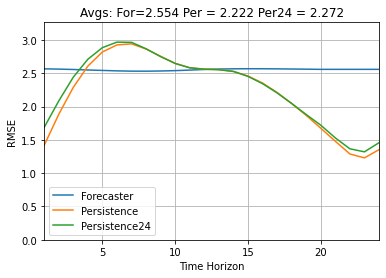

In [ ]:
predictions = TestMLmodel(Control_Var, ML_DATA, ML, Scaler)
results = get_results(Control_Var, DATA, ML_DATA, predictions)

#%% Post-Processing
post_process(Control_Var, results, DATA)

In [ ]:
import sklearn

In [ ]:
ML_DATA['Y_TEST'], predictions

SyntaxError: ignored

In [ ]:
print('The Coefficient of determination (R-squared) = {:.2f}'.format(sklearn.metrics.r2_score(ML_DATA['Y_TEST'], predictions)))
print('The RMSE error (RMSE)                        = {:.2f}'.format(sklearn.metrics.mean_squared_error(ML_DATA['Y_TEST'], predictions,squared=False)))

The Coefficient of determination (R-squared) = -0.55
The RMSE error (RMSE)                        = 0.26
